## Data stations ordered

### Purpose & Motivation

The purpose of this notebook is to create station specific wavelet files and freeway specific heatmap files for the Wiggle Visualization. The approach is based upon wavelets_exploration_on_wiggles.ipynb

### Direction from Advisor

N/A

### Tasks/Questions to Answer
#### Questions to Answer

N/A

#### Tasks

Create files that is consumed by the wiggle visualization.

### Results

See below

### Conclusions

N/A

### Imports and data prep

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack
import pandas as pd
import numpy as np
from scipy import signal
import time
import datetime as dt
import matplotlib
# import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import wavelet_lib as wl

In [2]:
!ls ../data/weekday_stats_2008_2015_d11.csv

../data/weekday_stats_2008_2015_d11.csv


In [3]:
# df = pd.read_csv('../data/2015_station_days_with_meta.csv', usecols=range(1,20))
# df = df.ix[df['Partition'] == 'Weekdays']
# flow_df = df.pivot(index='Station', columns='Time', values='Flow')
# flow_df.head()

In [4]:
df_new = pd.read_csv('../data/weekday_stats_2008_2015_d11.csv', usecols=range(1,5))
df_new.head()

,station,hour,minute,flow_mean
0,1100745,0,0,7.512630
1,1108341,0,0,51.487548
2,1118333,0,0,33.414307
3,1118663,0,0,57.559220
4,1119756,0,0,37.619578


In [5]:
df_new['Time'] = pd.to_datetime(df_new['hour'].astype('str') + ':' + df_new['minute'].astype('str'),
                                format='%H:%M').dt.time
df_new.head()

,station,hour,minute,flow_mean,Time
0,1100745,0,0,7.512630,00:00:00
1,1108341,0,0,51.487548,00:00:00
2,1118333,0,0,33.414307,00:00:00
3,1118663,0,0,57.559220,00:00:00
4,1119756,0,0,37.619578,00:00:00


In [6]:
flow_df = df_new.pivot(index='station', columns='Time', values='flow_mean')
flow_df.head()

Time,00:00:00,00:05:00,00:10:00,00:15:00,00:20:00,00:25:00,00:30:00,00:35:00,00:40:00,00:45:00,...,23:10:00,23:15:00,23:20:00,23:25:00,23:30:00,23:35:00,23:40:00,23:45:00,23:50:00,23:55:00
station,,,,,,,,,,,,,,,,,,,,,
1100270,6.009901,5.852941,5.543689,5.320388,4.584158,4.890000,4.808081,4.131313,4.070707,3.890000,...,9.561224,8.857143,8.424242,7.940594,7.861386,8.050505,6.969072,7.520833,7.183673,7.112245
1100310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100313,8.481554,8.195385,8.176240,7.812285,7.913920,6.808239,6.503445,6.121063,5.731923,5.477362,...,16.253314,15.288377,14.346569,13.239216,12.760667,12.334806,12.161433,12.151277,11.530452,10.615422
1100323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100326,8.474893,7.870469,7.486141,7.034133,6.613782,6.311502,5.929412,5.611230,5.332977,4.971138,...,14.632675,14.567467,13.394989,13.073028,12.507733,11.843033,11.280683,10.827900,10.229044,10.088675


In [7]:
# a = flow_df[flow_df.index==1108148]
# a = np.array(a.transpose())
# a = np.concatenate(a)
# widths = np.arange(1, 100, 1)
# cwtmatr = signal.cwt(a, signal.morlet, widths)
# plt.imshow(cwtmatr, extent=[-1, 1, min(widths), max(widths)], cmap='PRGn', aspect='auto',
#            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
# plt.show()

Continuous wavelet transform shows magnitude of transform with denser colors.  Green is positive, purple is negative.  

### A Short Wavelet Scale

In [8]:
import time
import wavelet_lib as wl
reload(wl)

<module 'wavelet_lib' from 'wavelet_lib.pyc'>

In [9]:
x_axis_data = []
for hour in range(0, 24):
    if hour < 10:
        hour_text = "0%s" % hour
    else:
        hour_text = hour
    for minute in range(0, 60):
        if minute < 10:
            minute_text = "0%s" % minute
        else:
            minute_text = minute
        x_axis_data.append("%s:%s" % (hour_text, minute_text))
        
print len(x_axis_data)
x_axis = pd.DataFrame(x_axis_data)
x_axis.columns = ['x']
x_axis.to_csv('../vis/WiggleVis/data/heatmaps/x_axis.csv', index=False)

1440


In [10]:
length = 5*288
width = 5
my_s = 5
my_wave = signal.morlet(length,w=width,s=my_s)

In [11]:
start_time = time.time()

wavelet_result = {}
total = len(flow_df.index)
print total
counter = 0
for station in flow_df.index:
    counter += 1
    if counter % 10 == 0:
        print counter
    a = flow_df[flow_df.index == station]
    a = np.array(a.transpose())
    a = np.concatenate(a)
    a = np.repeat(a, 5)

    wt = wl.my_wavelet_transform(a, my_wave)
    smooth = wl.smooth_amplitude(wt)*100
#     original = a
#     result = pd.DataFrame({'wt': wt, 'smooth': smooth, 'original': a})
#     result = pd.DataFrame({'wt': wt, 'wt_real': np.real(wt), 'original': a})
#     result = pd.DataFrame({'x': x_axis_data, 'wt': np.real(wt), 'original': a})
    result = pd.DataFrame({'wt': np.real(wt), 'original': a})
#     print result.head()
#     print station
#     result = result.set_index('x')
#     print result.head()
    result.to_csv('../vis/WiggleVis/data/stations/%s.csv' % station, index=False)
#     print station
    break

print station
print "total_time: %s" % str(time.time() - start_time)

1783
1100270
total_time: 1.03542208672


(288, 1)
(288,)
(1440,)
134


//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


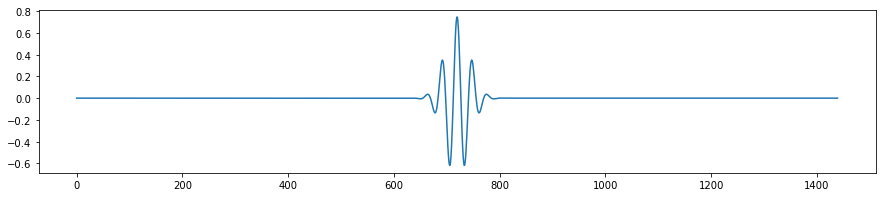

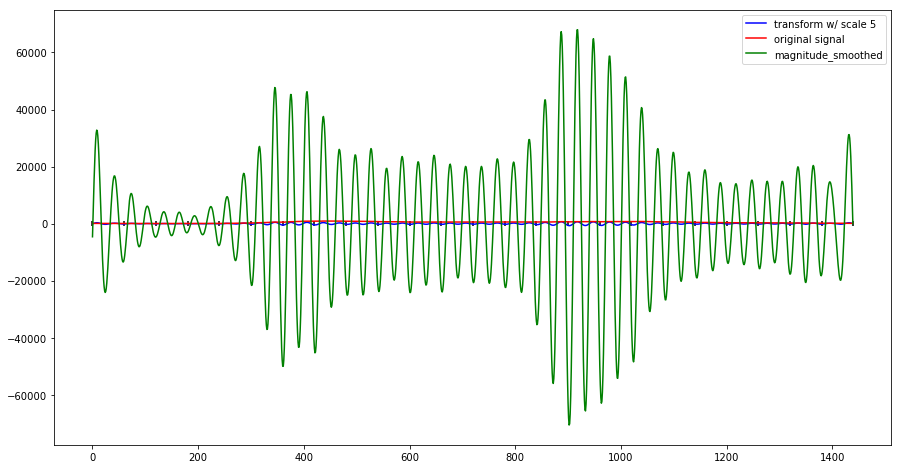

In [12]:
width = 5
my_s = 5
a = flow_df[flow_df.index==1108148]
a = np.array(a.transpose())
print a.shape
a = np.concatenate(a)
print a.shape
a = np.repeat(a, 5)
print a.shape

plt.figure(figsize=(15,3))
my_wave = signal.morlet(len(a),w=width,s=my_s)
print len([i for i in my_wave if abs(i)>.01])

plt.plot(my_wave)
plt.show()

plt.figure(figsize=(15,8))
wt = wl.my_wavelet_transform(a,my_wave)
plt.plot(wt, color='b', label = 'transform w/ scale {}'.format(str(width)))
plt.plot(a, color='r', label = 'original signal')
# plt.plot(wl.smooth_amplitude(wt)*100,color='g', label = 'magnitude_smoothed')
plt.plot(np.real(wt)*100,color='g', label = 'magnitude_smoothed')
plt.vlines([(len(a)/24)*j for j in range(25)],-1000,1000)

plt.legend()
plt.show()

### Apply to a bunch

In [13]:
meta_df = pd.read_csv('../data/meta_2008_2015.csv')

In [14]:
meta_df.Dir.unique()

array(['W', 'E', 'S', 'N'], dtype=object)

In [15]:
meta_df.columns

Index([u'Unnamed: 0', u'ID', u'Fwy', u'Dir', u'District', u'County', u'City',
       u'State_PM', u'Abs_PM', u'Latitude', u'Longitude', u'Length', u'Type',
       u'Lanes', u'Name', u'User_ID_1', u'User_ID_2', u'User_ID_3',
       u'User_ID_4', u'file_date'],
      dtype='object')

In [16]:
meta_df[(meta_df.Dir == 'E') & (meta_df.Fwy == 56) & (meta_df.Type == 'ML')]

,Unnamed: 0,ID,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4,file_date
208,677,1113743,56,E,11,73,66000.0,3.187,3.187,32.952419,-117.193034,0.148,ML,3,CARMEL VALLEY RD,446.0,NaN,NaN,NaN,12_20
209,683,1113772,56,E,11,73,66000.0,4.521,4.521,32.965949,-117.177412,1.372,ML,2,RNCHO SANTA FE FARMS,452.0,NaN,NaN,NaN,12_20
224,666,1113722,56,E,11,73,66000.0,2.909,2.909,32.950976,-117.197404,1.991,ML,2,CARMEL VALLEY RD,445.0,NaN,NaN,NaN,04_02
225,669,1113763,56,E,11,73,66000.0,5.948,5.948,32.960111,-117.155202,1.675,ML,2,CAMINO DEL SUR,451.0,NaN,NaN,NaN,04_02
242,665,1113680,56,E,11,73,66000.0,6.862,7.364,32.953394,-117.133404,0.999,ML,3,BLACK MOUNTAIN RD,434.0,NaN,NaN,NaN,01_01
256,1350,1122991,56,E,11,73,66000.0,8.775,9.277,32.962233,-117.102057,0.382,ML,2,West of I-15,22411.0,NaN,NaN,NaN,01_01
856,499,1108739,56,E,11,73,66000.0,T.966,0.966,32.937845,-117.226663,0.736,ML,3,CARMEL CREEK RD,14503.0,NaN,NaN,NaN,12_17
858,501,1108741,56,E,11,73,66000.0,1.891,1.891,32.944548,-117.212950,0.971,ML,3,Carmel Country Rd,14507.0,NaN,NaN,NaN,12_17
1016,659,1113740,56,E,11,73,66000.0,3.188,3.188,32.952425,-117.193019,0.806,ML,2,CARMEL VALLEY RD,14601.0,NaN,NaN,NaN,12_17
1655,1299,1125201,56,E,11,73,66000.0,7.671,8.173,32.956215,-117.119934,1.195,ML,3,Black Mt to 56E,14709.0,NaN,NaN,NaN,12_17


In [17]:
import math
for Fwy in meta_df.Fwy.unique():
    for Dir in meta_df.Dir.unique():
        idx1 = meta_df['Fwy'] == Fwy
        idx2 = meta_df['Dir'] == Dir
        idx3 = meta_df['Type'] == 'ML'
        fwy_df = meta_df.ix[idx1&idx2&idx3,:].sort_values('Abs_PM', ascending=True).set_index('ID')
        print fwy_df.index
        if len(fwy_df) > 0:
            print "Fwy: %s Dir: %s" % (Fwy, Dir)
            t1 = time.time()
            my_list = []
            for station in fwy_df.index:
                a = flow_df[flow_df.index==station]
                a = np.array(a.transpose())
                a = np.concatenate(a)
                a = np.repeat(a, 5)
                wt = wl.my_wavelet_transform(a,my_wave)
#                 my_list.append(wl.smooth_amplitude(wt))
                real_data = np.real(wt)
#                 my_list.append(real_data)
                series_data = pd.Series(real_data).apply(
                    lambda x: 0 if x == 0 else -1*math.log(-1*x) if x < 0 else math.log(x))
                my_list.append(np.real(series_data))
            my_array = np.vstack(my_list)
            frame = pd.DataFrame(np.real(my_array))
            frame.index = fwy_df.Name
            frame.to_csv('../vis/WiggleVis/data/heatmaps/wiggle_analysis_%s_%s.csv' % (Fwy, Dir))
            frame.index = fwy_df.index
            frame.to_csv('../vis/WiggleVis/data/heatmaps/wiggle_analysis_%s_%s_for_segment.csv' % (Fwy, Dir))
            t2 = time.time()
            print t2-t1

Int64Index([1113349, 1118989, 1111558, 1108285, 1122956, 1108287, 1108289,
            1108291, 1108293, 1108295, 1108297, 1108302, 1108304, 1108306,
            1108308, 1108311, 1108313, 1108315, 1108317, 1113173, 1113126,
            1114001, 1120121],
           dtype='int64', name=u'ID')
Fwy: 94 Dir: W
19.1126499176
Int64Index([1108380, 1108378, 1122951, 1108376, 1111568, 1111559, 1111567,
            1118648, 1108374, 1108505, 1114441, 1108503, 1113966, 1108501,
            1113181, 1113318],
           dtype='int64', name=u'ID')
Fwy: 94 Dir: E
13.1523020267
Int64Index([], dtype='int64', name=u'ID')
Int64Index([], dtype='int64', name=u'ID')
Int64Index([1112996, 1108619, 1108621, 1108401, 1108760, 1116167, 1108623,
            1115897, 1108625, 1108647, 1118260, 1108627, 1108629, 1108643,
            1108631, 1116433, 1116431, 1108762, 1108599, 1108697, 1108700,
            1115692, 1108704, 1126022, 1126035, 1108708],
           dtype='int64', name=u'ID')
Fwy: 78 Dir: W
21.343680

In [18]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
ID,,,,,,,,,,,,,,,,,,,,,
1108689,-3.197794,2.887078,4.080516,4.577710,4.871713,5.059292,5.176149,5.238690,5.254897,5.228020,...,5.474555,5.516213,5.516640,5.474396,5.384324,5.235519,5.005658,4.643021,3.981896,-0.221867
1108731,-2.888958,2.894772,3.969792,4.443381,4.726254,4.906623,5.017844,5.075367,5.086639,5.054497,...,5.353842,5.402295,5.408866,5.372692,5.289267,5.148693,4.930726,4.589506,3.986647,1.915587
1108733,-2.695898,2.590300,3.704612,4.186566,4.473523,4.656605,4.769968,4.829379,4.842449,4.812125,...,5.078453,5.119967,5.120367,5.078251,4.988536,4.840459,4.612039,4.252568,3.601304,0.249902


In [19]:
!ls ../vis/WiggleVis/data/heatmaps/

speed_125_N.csv                       wiggle_analysis_52_E_for_segment.csv
speed_125_S.csv                       wiggle_analysis_52_W.csv
speed_15_N.csv                        wiggle_analysis_52_W_for_segment.csv
speed_15_S.csv                        wiggle_analysis_54_E.csv
speed_163_N.csv                       wiggle_analysis_54_E_for_segment.csv
speed_163_S.csv                       wiggle_analysis_54_W.csv
speed_52_E.csv                        wiggle_analysis_54_W_for_segment.csv
speed_52_W.csv                        wiggle_analysis_56_E.csv
speed_54_E.csv                        wiggle_analysis_56_E_for_segment.csv
speed_54_W.csv                        wiggle_analysis_56_W.csv
speed_56_E.csv                        wiggle_analysis_56_W_for_segment.csv
speed_56_W.csv                        wiggle_analysis_5_N.csv
speed_5_N.csv                         wiggle_analysis_5_N_for_segment.csv
speed_5_S.csv                         wiggle_analysis_5_S.csv
speed_78_E.csv                       

In [18]:
# idx1 = meta_df['Fwy'] == 15
# idx2 = meta_df['Dir'] == 'S'
# idx3 = meta_df['Type'] == 'ML'
# fwy_df = meta_df.ix[idx1&idx2&idx3,:].sort_values('Abs_PM', ascending=False)
# print len(fwy_df)

84


In [14]:
# t1 = time.time()
# my_list = []
# for station in fwy_df.index:
#     a = flow_df[flow_df.index==station]
#     a = np.array(a.transpose())
#     a = np.concatenate(a)
#     a = np.repeat(a, 5)
#     wt = wl.my_wavelet_transform(a,my_wave)
#     my_list.append(wl.smooth_amplitude(wt))
# my_array = np.vstack(my_list)
# frame = pd.DataFrame(np.real(my_array))
# frame.to_csv('../vis/WiggleVis/data/heatmaps/wiggle_analysis_%s_%s.csv' % (15, 'S'))
# t2 = time.time()
# print t2-t1
# frame.head()


58.3365550041


,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,0.005035,0.224702,0.432648,0.618864,0.774614,0.892913,0.968886,1.0,0.986145,0.929571,...,0.882036,0.962008,1.000000,0.992918,0.939984,0.842834,0.705475,0.534102,0.336775,0.122994
1,0.003703,0.221707,0.429183,0.615874,0.772675,0.892147,0.968924,1.0,0.984860,0.925465,...,0.826666,0.926872,0.986000,1.000000,0.967179,0.888344,0.766792,0.608160,0.420123,0.211969
2,0.037103,0.254132,0.458895,0.641336,0.792649,0.905766,0.975742,1.0,0.978434,0.913361,...,0.835969,0.932848,0.988902,1.000000,0.964346,0.882641,0.758096,0.596287,0.404874,0.193181
3,0.024773,0.241095,0.445956,0.629364,0.782527,0.898334,0.971736,1.0,0.982815,0.922258,...,0.850761,0.942813,0.993871,1.000000,0.959591,0.873513,0.745120,0.580103,0.386204,0.172799
4,0.054401,0.270319,0.473331,0.653474,0.802057,0.912148,0.978941,1.0,0.975350,0.907425,...,0.848078,0.941024,0.993006,1.000000,0.960324,0.874794,0.746735,0.581829,0.387832,0.174144


In [20]:
frame.shape

(3, 1440)

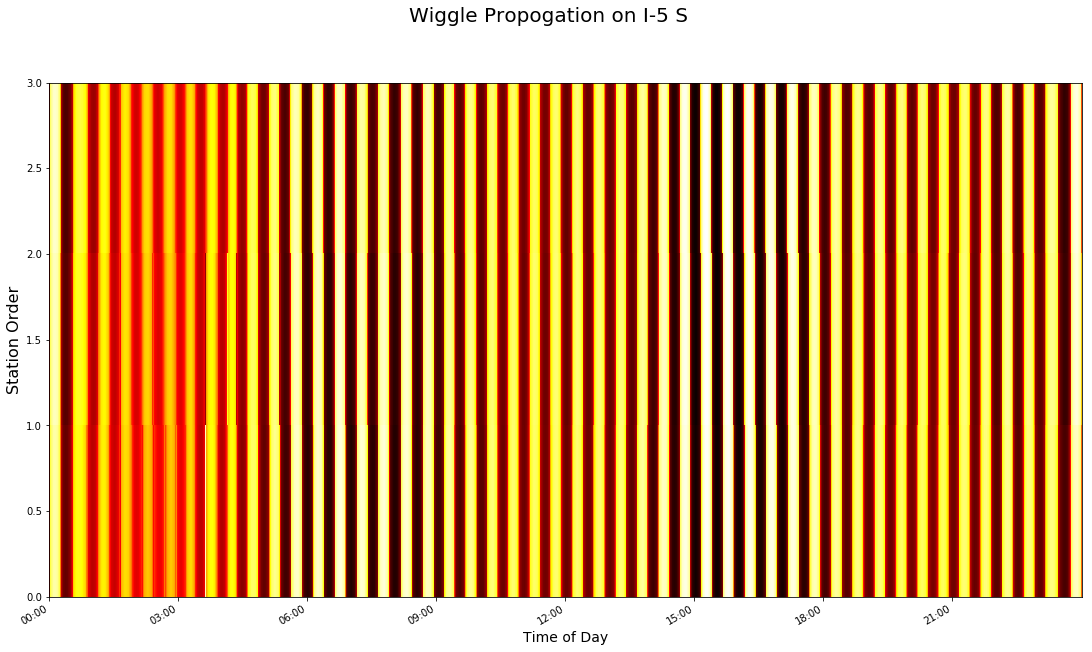

In [21]:
# Generate some random data for imshow
N = 10
# arr = np.random.random((N, N))

# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = [dt.datetime(2017,1,1,0,0,0),dt.datetime(2017,1,1,23,59,59)]

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

# Set some generic y-limits.
y_lims = [0, len(my_list)]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Wiggle Propogation on I-5 S", fontsize=20)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Station Order', fontsize=16)
# Using ax.imshow we set two keyword arguments. The first is extent.
# We give extent the values from x_lims and y_lims above.
# We also set the aspect to "auto" which should set the plot up nicely.
ax.imshow(np.real(my_array), cmap='hot', extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]], 
          aspect='auto')

# We tell Matplotlib that the x-axis is filled with datetime data, 
# this converts it from a float (which is the output of date2num) 
# into a nice datetime string.
ax.xaxis_date()

# We can use a DateFormatter to choose how this datetime string will look.
# I have chosen HH:MM:SS though you could add DD/MM/YY if you had data
# over different days.
date_format = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(date_format)

# This simply sets the x-axis data to diagonal so it fits better.
fig.autofmt_xdate()

plt.show()

In [22]:
fwy_df.to_csv('station_order.csv')

In [23]:
pd.DataFrame(np.real(my_array)).to_csv('wiggle_analysis.csv')

In [24]:
start_time = 9
end_time = 10
small = np.real(my_array)[:,int(60*start_time):int(60*end_time)]

In [25]:
# plt.imshow(small, cmap='hot',aspect='auto')

# Generate average speed data

In [26]:
speed_data = pd.read_csv('../data/weekday_stats_2008_2015_d11.csv')[['station', 'hour', 'minute', 'speed_mean']]
speed_data['Time'] = pd.to_datetime(speed_data['hour'].astype('str') + ':' + speed_data['minute'].astype('str'),
                                format='%H:%M').dt.time
speed_data = speed_data[['station', 'Time', 'speed_mean']]
speed_data = speed_data.fillna(0)
speed_data.head()

,station,Time,speed_mean
0,1100745,00:00:00,0.000000
1,1108341,00:00:00,67.526580
2,1118333,00:00:00,67.991505
3,1118663,00:00:00,65.625787
4,1119756,00:00:00,68.452814


In [27]:
speed_df = speed_data.pivot(index='station', columns='Time', values='speed_mean')
speed_df.head()

Time,00:00:00,00:05:00,00:10:00,00:15:00,00:20:00,00:25:00,00:30:00,00:35:00,00:40:00,00:45:00,...,23:10:00,23:15:00,23:20:00,23:25:00,23:30:00,23:35:00,23:40:00,23:45:00,23:50:00,23:55:00
station,,,,,,,,,,,,,,,,,,,,,
1100270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
speed_df.describe()

Time,00:00:00,00:05:00,00:10:00,00:15:00,00:20:00,00:25:00,00:30:00,00:35:00,00:40:00,00:45:00,...,23:10:00,23:15:00,23:20:00,23:25:00,23:30:00,23:35:00,23:40:00,23:45:00,23:50:00,23:55:00
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,...,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,41.589043,41.451099,41.383691,41.334354,41.295541,41.264115,41.238584,41.213025,41.204521,41.192060,...,41.203218,41.203602,41.191571,41.182776,41.180553,41.194649,41.221531,41.223242,41.207979,41.189188
std,33.127504,33.017344,32.963659,32.924739,32.893955,32.869545,32.849255,32.829217,32.823168,32.813695,...,32.821669,32.822874,32.814099,32.807449,32.805537,32.816321,32.837413,32.838319,32.826154,32.812147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.332874,66.138904,66.023946,65.967478,65.936000,65.851886,65.772660,65.709807,65.694397,65.681609,...,65.733126,65.748406,65.740221,65.717881,65.730553,65.731544,65.801309,65.842905,65.770402,65.718624
75%,68.138582,67.948975,67.845522,67.762927,67.697447,67.673388,67.620035,67.578556,67.566661,67.549797,...,67.566511,67.548656,67.551599,67.552609,67.555888,67.550048,67.566515,67.569037,67.574425,67.549531
max,73.611224,73.313811,73.039130,72.925064,72.934783,73.005627,72.891304,72.838875,72.859847,72.817391,...,72.399744,72.484143,72.503069,72.545780,72.513811,72.565473,72.536317,72.458056,72.524297,72.513555


In [29]:
import seaborn as sns
cmap = sns.diverging_palette(h_neg=0, h_pos=260, s=99, l=10,as_cmap=True, center='light')

In [30]:
def plot_stats(df=speed_df, stat='speed', minmax=[20, 85], _title='speed_plot'):
    f, axes = plt.subplots(1, 1, figsize=(15, 15), sharey=True)
    f.suptitle(_title)
    sns.despine(left=True)
    sns.set(context="paper", font="monospace")
    
    all_stats = stat.replace(" ", "")+'_mean'
    print "all_stats: %s" % all_stats

#     i=0
#     for a in all_stats:
    sns.heatmap(df, 
                vmin = minmax[0],
                vmax = minmax[1],
                ax=axes,
                xticklabels=12, 
                cmap=cmap,
                cbar=True,
                cbar_kws = {'orientation': 'horizontal'})
    axes.set_title(a)
#         i += 1
#     f.savefig('../images/'+_title+'.pdf', bbox_inches='tight')
    return None

In [31]:
for Fwy in meta_df.Fwy.unique():
    for Dir in meta_df.Dir.unique():
        idx1 = meta_df['Fwy'] == Fwy
        idx2 = meta_df['Dir'] == Dir
        idx3 = meta_df['Type'] == 'ML'
        fwy_df = meta_df.ix[idx1&idx2&idx3,:].sort_values('Abs_PM', ascending=True).set_index('ID')
        print fwy_df.index
        if len(fwy_df) > 0:
            print "Fwy: %s Dir: %s" % (Fwy, Dir)
            t1 = time.time()
            my_list = []
            for station in fwy_df.index:
                a = speed_df[speed_df.index==station]
                a = np.array(a.transpose())
                a = np.concatenate(a)
                a = np.repeat(a, 5)
                if a.shape[0] == 0:
                    a=[0]*1440
#                 wt = wl.my_wavelet_transform(a,my_wave)
#                 my_list.append(wl.smooth_amplitude(wt))
#                 real_data = np.real(wt)
#                 my_list.append(real_data)
#                 series_data = pd.Series(real_data).apply(
#                     lambda x: 0 if x == 0 else -1*math.log(-1*x) if x < 0 else math.log(x))
#                 my_list.append(np.real(series_data))
                my_list.append(a)
            my_array = np.vstack(my_list)
            frame = pd.DataFrame(my_array)
            frame.index = fwy_df.Name
            frame.to_csv('../vis/WiggleVis/data/heatmaps/speed_%s_%s.csv' % (Fwy, Dir))
            t2 = time.time()
            print t2-t1

Int64Index([1113349, 1118989, 1111558, 1108285, 1122956, 1108287, 1108289,
            1108291, 1108293, 1108295, 1108297, 1108302, 1108304, 1108306,
            1108308, 1108311, 1108313, 1108315, 1108317, 1113173, 1113126,
            1114001, 1120121],
           dtype='int64', name=u'ID')
Fwy: 94 Dir: W
0.0562980175018
Int64Index([1108380, 1108378, 1122951, 1108376, 1111568, 1111559, 1111567,
            1118648, 1108374, 1108505, 1114441, 1108503, 1113966, 1108501,
            1113181, 1113318],
           dtype='int64', name=u'ID')
Fwy: 94 Dir: E
0.036544084549
Int64Index([], dtype='int64', name=u'ID')
Int64Index([], dtype='int64', name=u'ID')
Int64Index([1112996, 1108619, 1108621, 1108401, 1108760, 1116167, 1108623,
            1115897, 1108625, 1108647, 1118260, 1108627, 1108629, 1108643,
            1108631, 1116433, 1116431, 1108762, 1108599, 1108697, 1108700,
            1115692, 1108704, 1126022, 1126035, 1108708],
           dtype='int64', name=u'ID')
Fwy: 78 Dir: W
0.0951

In [32]:
for Fwy in meta_df.Fwy.unique():
    print "Fwy: %s" % Fwy
    for Dir in meta_df.Dir.unique():
        print "Dir: %s" % Dir
        try:
            test_speed_frame = pd.read_csv('../vis/WiggleVis/data/heatmaps/speed_%s_%s.csv' % (Fwy, Dir))
            test_wiggle_frame = pd.read_csv('../vis/WiggleVis/data/heatmaps/wiggle_analysis_%s_%s.csv' % (Fwy, Dir))
            if test_speed_frame.shape != test_wiggle_frame.shape:
                print 'speed: %s' % str(test_speed_frame.shape)
                print 'wiggle: %s' % str(test_wiggle_frame.shape)
                print "Error for %s %s" % (Fwy, Dir)
        except IOError:
            pass

Fwy: 94
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 78
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 5
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 805
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 8
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 163
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 15
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 52
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 125
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 905
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 56
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 54
Dir: W
Dir: E
Dir: S
Dir: N
Fwy: 67
Dir: W
Dir: E
Dir: S
Dir: N


In [33]:
test_speed_frame.head()

,Name,0,1,2,3,4,5,6,7,8,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,VALLEY RD/REO DR,67.033716,67.033716,67.033716,67.033716,67.033716,66.967289,66.967289,66.967289,66.967289,...,66.712848,66.712848,66.712848,66.712848,66.712848,66.708677,66.708677,66.708677,66.708677,66.708677
1,WOODMAN ST,67.573946,67.573946,67.573946,67.573946,67.573946,67.522941,67.522941,67.522941,67.522941,...,67.189549,67.189549,67.189549,67.189549,67.189549,67.188926,67.188926,67.188926,67.188926,67.188926
2,BRIARWOOD RD,68.091236,68.091236,68.091236,68.091236,68.091236,68.005699,68.005699,68.005699,68.005699,...,67.704842,67.704842,67.704842,67.704842,67.704842,67.779338,67.779338,67.779338,67.779338,67.779338


In [34]:
test_wiggle_frame.head()

,Name,0,1,2,3,4,5,6,7,8,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,VALLEY RD/REO DR,-3.197794,2.887078,4.080516,4.577710,4.871713,5.059292,5.176149,5.238690,5.254897,...,5.474555,5.516213,5.516640,5.474396,5.384324,5.235519,5.005658,4.643021,3.981896,-0.221867
1,WOODMAN ST,-2.888958,2.894772,3.969792,4.443381,4.726254,4.906623,5.017844,5.075367,5.086639,...,5.353842,5.402295,5.408866,5.372692,5.289267,5.148693,4.930726,4.589506,3.986647,1.915587
2,BRIARWOOD RD,-2.695898,2.590300,3.704612,4.186566,4.473523,4.656605,4.769968,4.829379,4.842449,...,5.078453,5.119967,5.120367,5.078251,4.988536,4.840459,4.612039,4.252568,3.601304,0.249902


In [35]:
test_speed_frame = pd.read_csv('../vis/WiggleVis/data/heatmaps/speed_5_S.csv')
# del test_speed_frame['Name']

In [36]:
test_speed_frame = test_speed_frame.set_index('Name')
test_speed_frame.T.describe()

Name,N/O CMNO DE LA PLAZA,5 SB @ Via de Ysidro,N/O VIA DE SAN YSIDR,5 SB @ Dairy Mart,N/O DAIRY MART RD,5 SB N/0 905,5 SB @ Coronado Ave,.09 M N/O CORONADO,5 SB @ Main St,S/O MAIN ST,...,S/O SANTA MARGARITA,.5 N/O STA MARGRITA,1M S/O ALISO CREEK,5 SB N/O Rest Area,5 SB Las Pulgas Rd,5 NB Track Scale,5 SB Truck Scales,5 SB Nuclear Plant,5 SB Basilone Rd,5 SB Cristianitos Rd
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,59.167861,66.373896,68.306559,66.520936,66.066859,66.292700,65.270253,65.360662,64.344097,67.904256,...,67.594834,67.771700,68.230016,65.151692,64.317125,65.555589,64.982745,64.558227,64.516518,65.213727
std,7.185502,1.550941,2.340017,0.555189,1.759069,0.670233,0.679293,0.926581,0.871186,1.667057,...,1.662482,1.670012,1.291970,1.327887,1.758345,1.844656,1.620186,1.693716,1.891683,1.647947
min,42.970348,61.626193,61.922034,65.054550,63.594011,64.569533,63.619483,63.596367,62.200000,64.521850,...,62.938185,63.539717,65.121332,63.184939,61.896792,61.712279,62.832633,60.119248,61.872788,62.964403
25%,55.927642,66.308048,66.451195,66.225897,64.693199,66.249613,64.998944,64.613337,63.700000,66.702596,...,66.836137,66.918036,67.387471,64.026649,62.525581,64.040238,63.617207,63.066814,62.844414,63.686007
50%,61.307114,66.901366,68.968002,66.564736,65.254936,66.478490,65.280030,65.323231,64.500000,68.093534,...,67.978168,68.220024,68.485024,65.016574,64.036367,65.366063,64.477675,64.408137,63.982761,64.581301
75%,64.916942,67.333156,70.369003,66.799826,68.071735,66.688053,65.708023,66.153681,65.000000,69.470211,...,68.954829,69.239973,69.412639,66.104083,65.914436,66.790771,65.890992,65.623794,65.910116,66.439683
max,65.957192,68.054347,72.444479,67.637109,69.434722,67.337308,66.546696,67.291587,66.900000,70.267672,...,69.502415,69.862780,69.878681,68.123673,67.432633,68.818916,68.372677,67.819469,68.256637,68.413934


In [37]:
test_speed_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
Name,,,,,,,,,,,,,,,,,,,,,
N/O CMNO DE LA PLAZA,65.545808,65.545808,65.545808,65.545808,65.545808,65.079618,65.079618,65.079618,65.079618,65.079618,...,64.648262,64.648262,64.648262,64.648262,64.648262,64.803885,64.803885,64.803885,64.803885,64.803885
5 SB @ Via de Ysidro,68.054347,68.054347,68.054347,68.054347,68.054347,67.815201,67.815201,67.815201,67.815201,67.815201,...,67.651268,67.651268,67.651268,67.651268,67.651268,67.721581,67.721581,67.721581,67.721581,67.721581
N/O VIA DE SAN YSIDR,72.444479,72.444479,72.444479,72.444479,72.444479,71.709964,71.709964,71.709964,71.709964,71.709964,...,70.644062,70.644062,70.644062,70.644062,70.644062,70.659537,70.659537,70.659537,70.659537,70.659537
5 SB @ Dairy Mart,67.637109,67.637109,67.637109,67.637109,67.637109,67.385296,67.385296,67.385296,67.385296,67.385296,...,67.618100,67.618100,67.618100,67.618100,67.618100,67.507956,67.507956,67.507956,67.507956,67.507956
N/O DAIRY MART RD,69.434722,69.434722,69.434722,69.434722,69.434722,69.023132,69.023132,69.023132,69.023132,69.023132,...,68.245877,68.245877,68.245877,68.245877,68.245877,68.258725,68.258725,68.258725,68.258725,68.258725


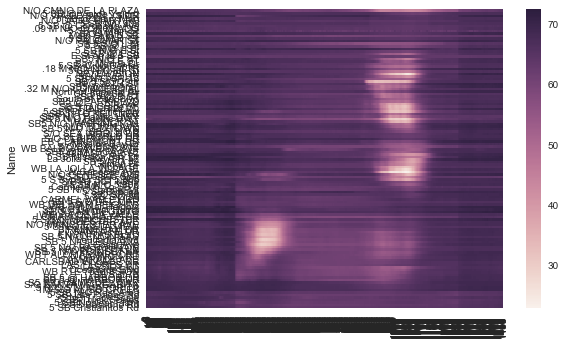

In [38]:
sns.heatmap(test_speed_frame)

all_stats: speed_mean


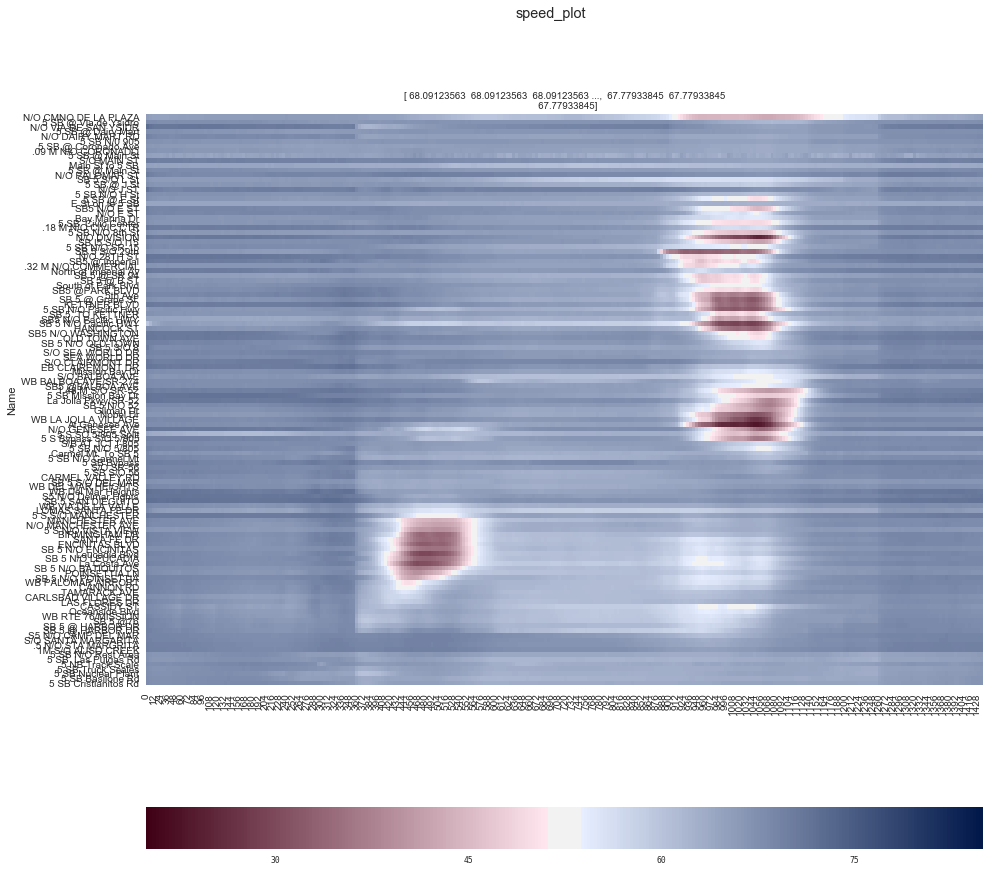

In [39]:
plot_stats(test_speed_frame)